In [42]:
# 1- In ‘Course_page_actions.csv’ dataset
# Test The Enrollment Rate in each group snd get the
# Alternative then test it
# Enrollment Rate for Ex:
# (For Experiment Group )( Experiment.action==’enroll’/
# Experiment.action==’view’)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("course_page_actions.csv")

In [3]:
data.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


# 1)Test The Enrollment Rate in each group #

In [6]:
data.group.unique()

array(['experiment', 'control'], dtype=object)

In [46]:
exp_enrolled = data.query("group == 'experiment' and action == 'enroll'")
exp = data.query("group == 'experiment'")
exp_enrolled.head()

,timestamp,id,group,action,duration
137,2016-09-28 02:08:53.050942,711838,experiment,enroll,201.785800
602,2016-10-10 11:30:33.838974,576318,experiment,enroll,176.921806
966,2016-10-21 20:18:42.363288,724590,experiment,enroll,99.759691
1008,2016-10-23 03:05:45.425012,314669,experiment,enroll,65.266778
1062,2016-10-24 13:30:25.843971,449244,experiment,enroll,61.008083


In [14]:
exp_enrollment_rate = exp_enrolled.shape[0] / exp.shape[0]
exp_enrollment_rate

0.0076372315035799524

In [47]:
ctrl_enrolled = data.query("group == 'control' and action == 'enroll'")
ctrl = data.query("group == 'control'")
ctrl_enrolled.head()

,timestamp,id,group,action,duration
7,2016-09-24 22:43:35.119748,701620,control,enroll,NaN
222,2016-09-30 11:57:44.059162,802405,control,enroll,NaN
231,2016-09-30 17:17:07.708962,524941,control,enroll,NaN
256,2016-10-01 08:40:31.380072,381758,control,enroll,NaN
362,2016-10-03 20:08:57.011373,757165,control,enroll,NaN


In [19]:
ctrl_enrollment_rate = ctrl_enrolled.shape[0] / ctrl.shape[0]
ctrl_enrollment_rate

0.012664640324214792

# Observable Difference #

In [22]:
obs_difference = exp_enrollment_rate - ctrl_enrollment_rate
obs_difference

-0.005027408820634839

# Hypothesis #

### Null Hypothesis: group 'experiment' enrollment rate is bigger than group 'control' enrollment rate ###
##### Null Hypothesis: experiment_enrollment_rate - control_enrollment_rate > 0 ####
### Alternative Hypothesis: group 'experiment' enrollment rate is smaller than or equal group ' control' enrollment rate ###
##### Alternative Hypothesis: experiment_enrollment_rate - control_enrollment_rate <= 0 ####


# 1)Gather Data #

In [37]:
difference = []
for _ in range(2000):
    sample = data.sample(data.shape[0],replace = True)
    exp_enrolled = sample.query("group == 'experiment' and action == 'enroll'")
    exp = sample.query("group == 'experiment'")
    exp_enrollment_rate = exp_enrolled.shape[0] / exp.shape[0]
    ctrl_enrolled = sample.query("group == 'control' and action == 'enroll'")
    ctrl = sample.query("group == 'control'")
    ctrl_enrollment_rate = ctrl_enrolled.shape[0] / ctrl.shape[0]
    difference.append(exp_enrollment_rate - ctrl_enrollment_rate)

(array([ 12.,  58., 163., 331., 506., 477., 305., 105.,  37.,   6.]),
 array([-0.01506558, -0.0129971 , -0.01092862, -0.00886014, -0.00679166,
        -0.00472318, -0.00265469, -0.00058621,  0.00148227,  0.00355075,
         0.00561923]),
 <BarContainer object of 10 artists>)

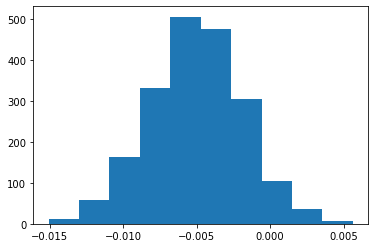

In [38]:
plt.hist(difference)

# 2)Create Null popluation #

(array([ 11.,  47., 155., 343., 529., 491., 295., 100.,  24.,   5.]),
 array([-0.01041823, -0.00826835, -0.00611847, -0.00396859, -0.00181871,
         0.00033117,  0.00248105,  0.00463093,  0.00678081,  0.00893069,
         0.01108057]),
 <BarContainer object of 10 artists>)

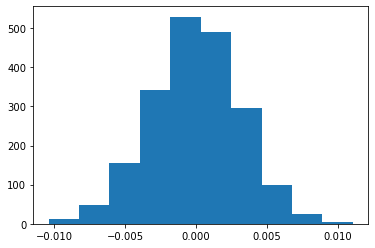

In [43]:
difference = np.array(difference)
normal = np.random.normal(0,difference.std(),difference.shape[0])
plt.hist(normal)

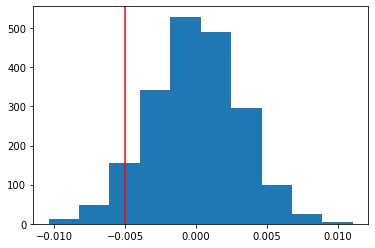

In [44]:
plt.hist(normal)
plt.axvline(obs_difference, c= 'red')

In [45]:
(normal<obs_difference).mean()

0.0615

# Conclusion: Alternative Hypothesis Rejected, Maintain current status #
#### group 'experiment' enrollment rate is bigger than group 'control' enrollment rate ###